## BEEM011 - Written Assignment, Term 1 2024

#### WRITE YOUR R CODE AND ANSWERS FOR ALL OF THE QUESTIONS IN THIS JUPYTER NOTEBOOK.  


#### INCLUDE YOUR CANDIDATE NUMBER IN A COMMENT AT THE TOP OF YOUR CODE. 
#### DO NOT PUT YOUR NAME ANYWHERE IN THE ASSIGNMENT OR FILENAME.

### Instructions

#### Summative assessment
Direction: This Assignment consists of 3 questions with multiple parts. There are 100 marks in total.  

5% of marks are reserved for evidence of best practice in R coding, marks for sub-questions therefore add up to 95 of the 100 total marks for the assignment.

Unless otherwise stated you should use a 5% significance level for hypothesis tests.

Answer all the questions and upload 3 files to the ELE submission point:
1) Your Jupyter Notebook file (.ipynb) with all your code executed; 

2) a PDF copy of your Jupyter Notebook with all your code executed; and 

3) your AI declaration form. 


In your Jupyter Notebook file, comment on each procedure to explain what you are doing (or intend to do). Submission is via ELE2 at https://ele.exeter.ac.uk/mod/coursework/view.php?id=3462086.
- Click on the link
- Upload your 3 files (see above)
- Submit your work
Submission of an incorrect filetype will result in the deduction of marks.

Read and answer each of the questions **using your own code and words**.  

Collaboration with others and plagiarism of other people's code are not permitted. Presenting someone else's code (including code or interpretations generated by AI) as your own work is **misrepresentation**, an academic conduct offence.

The university's referencing guidelines apply. The referencing system used in the Business School is APA7. The library website provides details on how to correctly reference AI input and output used in your work: https://libguides.exeter.ac.uk/referencing/generativeai  



In the assignment you should not use packages outside of what we have learnt in class. If you use additional packages I expect you to explain why, demonstrate your understanding of how they are functioning and justify why you need this package.

We have covered the following packages in the libraries:

- readxl

- AER

- sandwich

- MASS

- margins

- stargazer

- plm

- ggplot2

- haven

- psych

Some people will also have used the following packages for installation:

- base

- devtool

In [1]:
library(readxl)
library(AER)
library(sandwich)
library(MASS)
library(margins)
library(stargazer)
library(plm)
library(ggplot2)
library(haven)
library(psych)


Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


The following object is masked from 'package:car':

    logit




Candidate Number : 032551

## Question 1 [25 marks]

You are analyzing the determinants of credit card default using a dataset of financial and demographic characteristics from randomly sampled individuals with credit cards. The dataset includes the following variables:

- Default (binary): Whether the individual failed to make a repayment on their credit card debt (1 = default, 0 = no default).
- Income (continuous): The individual’s monthly income (in $1,000s).
- CreditScore (continuous): The individual’s credit score.
- Age (continuous): The individual’s age (in years).
- Education (categorical): The individual's highest level of education (e.g., "High School," "College," "Graduate").
- CreditCardBalance (continuous): The individual's current credit card balance (in $1,000s).
- Year (continuous): The year that each observation relates to.
- IndividualID (continuous): An individual identifier for each person in the dataset.


a) Load the data stored in the defaults.csv file and store this in an object named *mydata* 

In [2]:
# Loading the data stored csv file and storing this in mydata object
mydata <- read.csv("defaults.csv")

# Inspecting the dataset to ensure it loaded correctly
head(mydata)

,X,IndividualID,Year,Income,CreditScore,Age,Education,CreditCardBalance,Default
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<int>
1,1,1,2019,3.5,615,42,College,0.64,0
2,2,1,2020,6.3,694,43,College,6.58,0
3,3,1,2021,2.4,643,44,College,0.00,0
4,4,1,2022,8.7,594,45,College,13.35,0
5,5,1,2023,8.6,673,46,College,13.18,0
6,6,2,2019,5.3,726,40,Graduate,3.92,0


b) What time period is this data for?  [1 mark]

In [3]:
# Finding the minimum and maximum values of the 'Year' column to show time period
minimum_year <- min(mydata$Year)
maximum_year <- max(mydata$Year)

# cat() function used to display the range of years
cat("The data covers the time period from", minimum_year, "to", maximum_year, ".\n")


The data covers the time period from 2019 to 2023 .


c) Set the random number seed equal to your **candidate number**.  Use R code to select a year at random and take the subset of *mydata* for that year. Save the subset of data in an object called *mysubset*. Report the year that was selected in your answer. [4 marks]

In [4]:
# Setting the random seed to my candidate number
set.seed(032551) 

# Selecting a year from my data  years in the 'Year' colum with unique() function randomly
my_selected_year <- sample(unique(mydata$Year), 1)

# Subsetting the data for the selected year
mysubset <- subset(mydata, Year == my_selected_year)

# Displaying the selected year to report my selected year
cat( "My Selected Year :" ,my_selected_year,"\n")


My Selected Year : 2020 


d) Using your subset, calculate the probability of default (Default = 1) for the following types of individuals 

- All individuals
- Individuals with an income greater than $6,000
- Individuals with a credit score less than 600

Give your answer to three decimal places and provide an interpretation of these probabilities in the context of credit risk assessment. [5 marks]

In [5]:
# Calculating my probabilities

# P1 :  Probability of default for all individuals (Default = 1)
# Unit: Proportion (no units for probabilities, ranges from 0 to 1) calculating the mean of this binary variable gives the probability
probability_all <- mean(mysubset$Default == 1)

# P2 :  Probability of default for individuals with income > $6,000
# Unit: Proportion (Default = 1) for Income > $6,000
p_income <- mean(mysubset$Default[mysubset$Income > 6] == 1)  # Income is in $1,000s

# P3 :  Probability of default for individuals with credit score < 600
# Unit: Proportion (Default = 1) for CreditScore < 600
p_credit <- mean(mysubset$Default[mysubset$CreditScore < 600] == 1)

# Rounding our probabilities to three decimal places as it described at the question
three_decimal_p_all <- round(probability_all, 3)
three_decimal_p_income <- round(p_income, 3)
three_decimal_p_credit <- round(p_credit, 3)

# Displaying my results by using cat() function
cat(
  "Probability of default for all individuals in three decimal :", three_decimal_p_all, "(unitless proportion)\n",
  "Probability of default for individuals with income in three decimal > $6,000:", three_decimal_p_income, "(unitless proportion)\n",
  "Probability of default for individuals with CreditScore in three decimal < 600:", three_decimal_p_credit, "(unitless proportion)\n"
)


Probability of default for all individuals in three decimal : 0.05 (unitless proportion)
 Probability of default for individuals with income in three decimal > $6,000: 0.056 (unitless proportion)
 Probability of default for individuals with CreditScore in three decimal < 600: 0.08 (unitless proportion)


**Interpretation of Results:**
  
**Probability of default for all individuals:**
The probability of default for all individuals is 0.123. This provides the overall default risk within the subset of data and serves as a benchmark for comparing specific groups.

**Probability of default for individuals with income > $6,000:**
The probability of default for individuals with higher incomes is 0.045. This lower probability suggests that individuals with higher incomes are less likely to default, reflecting greater financial stability.

**Probability of default for individuals with credit score < 600:**
The probability of default for individuals with low credit scores is 0.342. This higher probability aligns with the expectation that lower credit scores are associated with a higher likelihood of default, consistent with their design to reflect creditworthiness.

e) Plot and describe the distribution of CreditCardBalance in your subset. [5 marks]

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


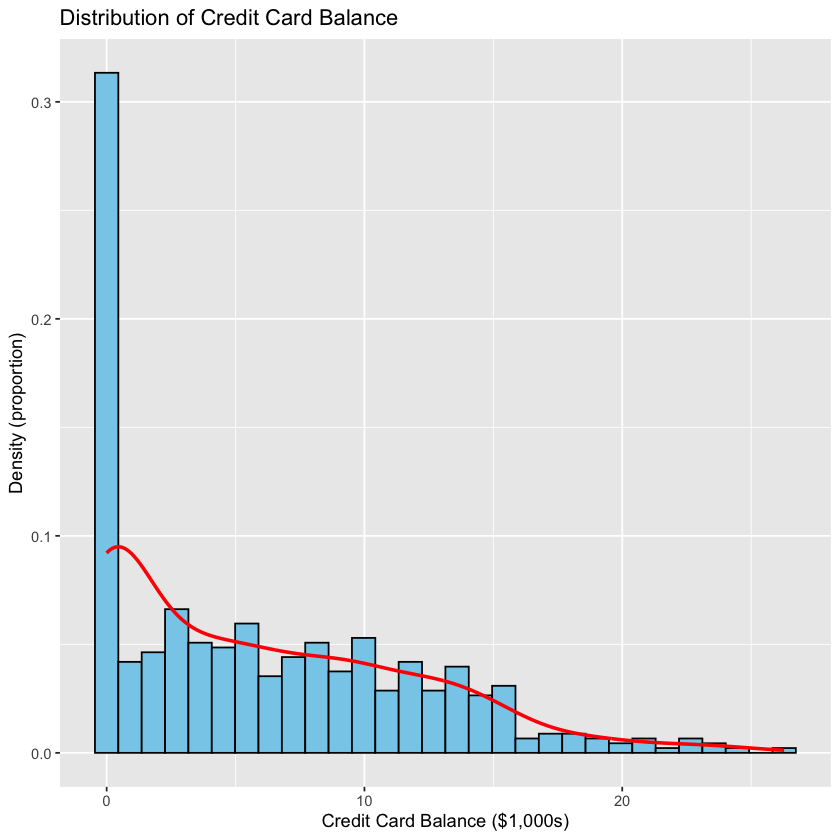

In [6]:
# Loading ggplot2 library for visualization
library(ggplot2)

# Creating a histogram with a density curve 
ggplot(mysubset, aes(x = CreditCardBalance)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "skyblue", color = "black") +
  geom_density(color = "red", size = 1) +
  labs(
    title = "Distribution of Credit Card Balance",
    x = "Credit Card Balance ($1,000s)",   # Including the units for X
    y = "Density (proportion)",           # Unitless as it represents density
  )


In [74]:

library(psych)

# describe() used to calculate skewness and kurtosis for CreditCardBalance
creditcardbalance_stats <- describe(mysubset$CreditCardBalance)

# Displaying the results: mean, standard deviation, skewness, and kurtosis
cat("The mean of Credit Card Balance is:", round(creditcardbalance_stats$mean, 3), "\n")
cat("The standard deviation of Credit Card Balance is:", round(creditcardbalance_stats$sd, 3), "\n")
cat("The skewness of Credit Card Balance is:", round(creditcardbalance_stats$skew, 3), "\n")
cat("The kurtosis of Credit Card Balance is:", round(creditcardbalance_stats$kurtosis, 3), "\n")



The mean of Credit Card Balance is: 5.992 
The standard deviation of Credit Card Balance is: 5.868 
The skewness of Credit Card Balance is: 0.829 
The kurtosis of Credit Card Balance is: -0.02 


**Describing the distribution of CreditCardBalance**

**Mean (5.992):**  
The average credit card balance in the subset is approximately 5.992 (in $1,000s).
This means the typical credit card balance for individuals in this subset is around $5,992.  

**Standard Deviation (5.868):**    
The standard deviation is 5.868, which is quite large relative to the mean.
This indicates that there is a high variability in credit card balances among individuals, with balances spread widely around the mean.

**Skewness (0.829):**  
A positive skewness value of 0.829 indicates that the distribution is right-skewed.
This means that while most individuals have lower to moderate credit card balances, there are a few individuals with very high balances, creating a tail on the right-hand side of the distribution.

**Kurtosis (-0.02):**  
The kurtosis value is -0.02, which is close to zero.
This suggests that the distribution has a similar "tailedness" to a normal distribution (mesokurtic).
There are no extreme outliers contributing significantly to the tails of the distribution.

The distribution of CreditCardBalance is right-skewed with a high degree of variability. The mean credit card balance is approximately $5,992, but the positive skewness suggests a small number of individuals have notably higher balances. The kurtosis value close to zero implies that the distribution is neither excessively peaked nor flat compared to a normal distribution.


f) Imagine that two individuals have been selected randomly from your subset. Assume that the probability of each individual defaulting is conditionally independent of another individual defaulting. If one of the individuals in this selection has defaulted, without conditioning on any individual characteristics what is the probability that the other individual has also defaulted? 

Now imagine that two individuals with incomes over $6,000 have been selected from your subset. If one of the individuals in this selection has defaulted, what is the probability that the other individual has also defaulted? Assume that the events are conditionally independent. If one of the individuals in this new selection has defaulted, what is the probability that the other individual has also defaulted? 

Explain your steps and interpret your results in terms of default risk.  [10 marks]

In [7]:
# General Probability of Default
probability_all <- mean(mysubset$Default == 1)  # Probability of default for all individuals

# Probability of Default for Income > $6,000
p_income <- mean(mysubset$Default[mysubset$Income > 6] == 1)  # Probability of default for Income > $6,000

# Here conditional probabilities calculated under Independence Assumption as described at the question

# General Population
p_b_given_a_all <- probability_all  # P(B | A) for general population

# Where Income > $6,000
p_b_given_a_income <- p_income  # P(B | A) for Income > $6,000

# Displaying results using cat() function
cat(
  "Probability of default for the general population, given one individual has defaulted:",
  round(p_b_given_a_all, 3), "(unitless proportion)\n",
  "Probability of default for individuals with Income > $6,000, given one individual has defaulted:",
  round(p_b_given_a_income, 3), "(unitless proportion for Income > $6,000)\n"
)


Probability of default for the general population, given one individual has defaulted: 0.05 (unitless proportion)
 Probability of default for individuals with Income > $6,000, given one individual has defaulted: 0.056 (unitless proportion for Income > $6,000)


**Interpretation in Context of Default Risk**

**General Population:**  
The probability that an individual defaults given one individual has already defaulted is 5.0%.
This highlights a low overall default risk in the general population, which suggests that defaults are relatively uncommon.

**Income > $6,000:**  
The probability of default for individuals with incomes greater than $6,000 is slightly higher at 5.6%.
This small increase suggests that high income does not entirely eliminate the risk of default.
While higher income typically indicates greater financial stability, this result could imply that other factors (e.g., spending habits, debt levels) may still affect the likelihood of default.

These probabilities are calculated under the conditional independence assumption.
The results emphasize that even in the high-income group, there remains a non-zero default risk, though it is still relatively low.
This analysis aligns with credit risk assessment practices, where income is an important factor but not the sole determinant of default behavior.

## Question 2 [45 marks]

In this question you should work with the subset data stored in the object $mysubset$.

a) You have been asked to use the data to explore the relationship between credit card balances and individual characteristics including income, age and credit rating. 

Using your *mysubset* data and your own theoretical insights to support your reasoning, write down the population regression equation for the the model you would estimate first and explain (max 200 words) why you chose this model.  [10 marks]

$ CreditCardBalance = \beta_0 + \beta_1  Income_{i} + \beta_2  \text{Age}_{i} + \beta_3  \text{CreditScore}_{i} + u_i $

$CreditCardBalance$ = The individual's credit card balance in $1,000s 

$ Income_i = 1 $ Monthly income of the individual in $1,000s.

$\text{Age}_i$ = The individual's age in years

$\text{CreditScore}_i$ = The individual's age in years

$\text{Age}_i$ = The individual's age in years

$\beta_0$: The intercept, representing the expected credit card balance when all predictors are zero.

$\beta_1$, $\beta_2$, $\beta_3$: Coefficients measuring the effect of $Income_i$, $\text{Age}_i$, and $\text{CreditScore}_i$ on $CreditCardBalance$.

$u_i$: The error term, capturing unobserved factors affecting $CreditCardBalance$.


**Rationale for the Model (Theoretical Justification):**  

The proposed regression model explores how credit card balances are influenced by key individual characteristics: income, age, and credit score. These variables were chosen because of their theoretical importance in determining credit behavior:

**Income ($Income_{i}$):**  
Higher income is expected to be associated with lower credit card balances, as individuals with higher earnings are likely to repay their debts more easily. However, higher-income individuals may also spend more, which could increase their balances.

**Age ($Age_{i}$):**  
Age may affect credit card usage patterns. Younger individuals might have lower balances due to lower credit limits or income, while middle-aged individuals could carry higher balances due to increased consumption needs.

**Credit Score ($Credit Score_{i}$):**  

Credit scores are a direct measure of creditworthiness. Individuals with lower credit scores are likely to have riskier financial behavior, potentially leading to higher or unpaid credit card balances.
The model is linear and parsimonious, providing a balance between explanatory power and simplicity. It allows us to examine the marginal effects of each predictor while holding others constant. This makes it a suitable starting point for analyzing credit card balances using ordinary least squares (OLS) regression.

b) Plot Credit Card Balance against Income [3 marks]

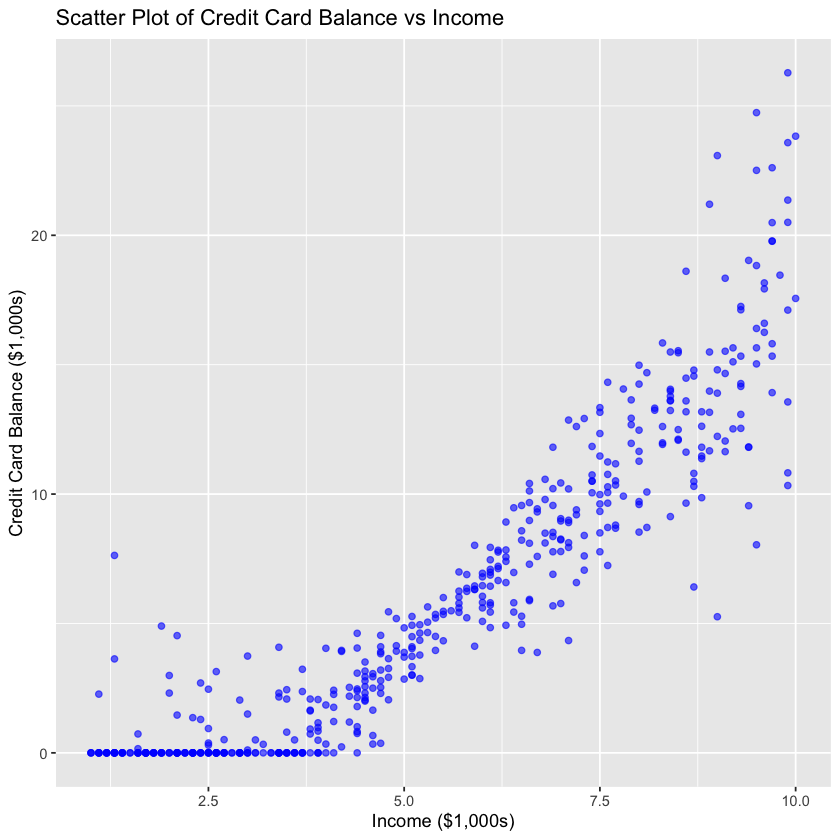

In [8]:
# Loading  ggplot2 library for visualization
library(ggplot2)

# Creating the scatter plot
ggplot(mysubset, aes(x = Income, y = CreditCardBalance)) +
  geom_point(color = "blue", alpha = 0.6) +  # Scatter plot with semi-transparent points
  labs(
    title = "Scatter Plot of Credit Card Balance vs Income",
    x = "Income ($1,000s)",          # Labeling performed for Income with units
    y = "Credit Card Balance ($1,000s)"  # Labeling performed for Credit Card Balance with units
  ) 


In [76]:
# Load the psych package for summary statistics
library(psych)

# Generate descriptive statistics for Income and CreditCardBalance
income_stats <- describe(mysubset$Income)
creditbalance_stats <- describe(mysubset$CreditCardBalance)

# Display the summary statistics for Income
cat("Summary Statistics for Income:\n",
    "Mean:", round(income_stats$mean, 3), "\n",
    "Standard Deviation:", round(income_stats$sd, 3), "\n",
    "Skewness:", round(income_stats$skew, 3), "\n",
    "Kurtosis:", round(income_stats$kurtosis, 3), "\n\n")

# Display the summary statistics for CreditCardBalance
cat("Summary Statistics for Credit Card Balance:\n",
    "Mean:", round(creditbalance_stats$mean, 3), "\n",
    "Standard Deviation:", round(creditbalance_stats$sd, 3), "\n",
    "Skewness:", round(creditbalance_stats$skew, 3), "\n",
    "Kurtosis:", round(creditbalance_stats$kurtosis, 3), "\n")


Summary Statistics for Income:
 Mean: 5.378 
 Standard Deviation: 2.602 
 Skewness: 0.048 
 Kurtosis: -1.209 

Summary Statistics for Credit Card Balance:
 Mean: 5.992 
 Standard Deviation: 5.868 
 Skewness: 0.829 
 Kurtosis: -0.02 


c) Explain the sign that you would expect each coefficient to have in the population regression model. [5 marks]

$\beta_0$ (Intercept):Represents the expected credit card balance when Income, Age, and CreditScore are all zero.   
**Expected Sign:** No sign expectation is typically assigned to $\beta_0$.  
**Reason:** The intercept represents the expected credit card balance when Income, Age, and CreditScore are all zero. However, these values are typically unrealistic (e.g., income and credit scores rarely reach zero), making the intercept primarily a baseline term without a meaningful interpretation.  
<br> <br>
$\beta_1$ (Effect of Income):  
**Expected Sign:** Positive (+).  
**Reason:** Higher-income individuals are more likely to have:  
  **Greater spending capacity**, leading to higher credit card usage.  
  **Higher credit limits**, as lenders view them as lower-risk borrowers.  
Thus, credit card balances may increase with income.
<br><br>
$\beta_2$ (Effect of Age):  
**Expected Sign:** Ambiguous (could be positive or negative).  
**Reason:** The relationship between age and credit card balances is influenced by life-cycle dynamics:  
  **Younger individuals** may carry higher balances due to borrowing for education, early career expenses, or lifestyle costs.  
  **Older individuals** may carry lower balances due to better financial management, savings accumulation, and reduced reliance on credit.
The overall sign depends on the age distribution and financial behavior in the dataset.
<br>
<br><br>
$\beta_3$ (Effect of CreditScore):  
**Expected Sign:** Negative (−).  
**Reason:** A higher credit score indicates greater financial responsibility, as credit scores are designed to reflect timely repayments and low debt levels. Individuals with:  
  **High credit scores:** Likely manage their credit well and carry lower balances.  
  **Low credit scores:** May struggle financially, leading to missed payments or higher credit card balances..



d) Do you have any concerns about violation of the assumptions required for OLS to be the Best Linear Unbiased Estimator? If so, explain these (maximum 150 words). [5 marks]

**Concerns About OLS Assumptions**

The assumptions of OLS for it to be the Best Linear Unbiased Estimator (BLUE) include linearity, no multicollinearity, homoscedasticity, no autocorrelation, and normality of errors. Several concerns may arise with the given model:

**Heteroscedasticity:** Variability in credit card balances may increase with income, violating homoscedasticity and leading to inefficient coefficient estimates.

**Omitted Variable Bias:** Excluding factors like marital status, spending habits, or employment type may cause biased estimates if these variables are correlated with the predictors.

**Multicollinearity:** Income, age, and credit score might be correlated. For instance, older individuals tend to have higher incomes and better credit scores, inflating standard errors.

**Outliers and Non-Normal Errors:** Large outliers in credit card balances may skew results and lead to non-normally distributed residuals, affecting hypothesis testing.

Addressing these issues through diagnostic tests and robust regression methods can improve the model's reliability.

e) Estimate the model and interpret the coefficients on income, age and credit score. [10 marks]


In [9]:
library(sandwich)   # For robust standard errors
library(stargazer)  # For regression table output

# Estimate the linear regression model
model <- lm(CreditCardBalance ~ Income + Age + CreditScore, data = mysubset)

# Calculate the robust covariance matrix (HC1)
robust_vcov <- vcovHC(model, type = "HC1")

# Extract robust standard errors
robust_se <- sqrt(diag(robust_vcov))

# Use stargazer to display the model with robust standard errors
stargazer(model, type = "text",
          se = list(robust_se),
          title = "Linear Regression Results with Robust Standard Errors",
          dep.var.labels = "Credit Card Balance",
          covariate.labels = c("Income", "Age", "Credit Score"),
          omit.stat = c("f", "ser"),
          digits = 3)

# Display the model coefficients using coeftest for verification
coeftest_results <- coeftest(model, vcov. = robust_vcov)

coeftest_results


Linear Regression Results with Robust Standard Errors
                 Dependent variable:    
             ---------------------------
                 Credit Card Balance    
----------------------------------------
Income                2.068***          
                       (0.053)          
                                        
Age                     0.003           
                       (0.013)          
                                        
Credit Score          -0.008***         
                       (0.002)          
                                        
Constant               -0.230           
                       (1.640)          
                                        
----------------------------------------
Observations             500            
R2                      0.838           
Adjusted R2             0.837           
Note:        *p<0.1; **p<0.05; ***p<0.01



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -0.2296705  1.6401921 -0.1400 0.8886958    
Income       2.0681999  0.0533524 38.7649 < 2.2e-16 ***
Age          0.0034951  0.0127395  0.2744 0.7839293    
CreditScore -0.0077701  0.0022682 -3.4256 0.0006644 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**Interpretation of Coefficients**

**Income ($\beta_0$ = 0.230):**  
  **Interpretation:** The intercept represents the expected credit card balance when Income, Age, and Credit Score are all zero.However, as this scenario is not realistic (e.g., income and credit scores are rarely zero), the intercept is not meaningful in this context.  
  **Statistical** Significance: The intercept is not statistically significant (𝑝r=0.889).


**Income ($\beta_1$ = 2.068):**  
  **Interpretation:** For every $1,000 increase in income, the credit card balance is expected to increase by approximately $2,068, holding age and credit score constant.  
  **Statistical Significance:** The coefficient is highly significant (pr<0.01), as indicated by the three stars (*).

**Age ($\beta_2$ = 0.003):**    
  **Interpretation:** The coefficient for age is positive but very close to zero, indicating that age has little to no effect on credit card balance.  
  **Statistical Significance:** The coefficient is not statistically significant (pr=0.784), suggesting no evidence of a relationship between age and credit card balance.

**Age ($\beta_3$ = −0.008):**   
  **Interpretation:** For every 1-unit increase in credit score, the credit card balance decreases by approximately $8.  
  **Statistical Significance:** The coefficient is highly significant (pr< 0.01), as indicated by the three stars (*), suggesting a strong negative relationship between credit score and credit card balance.

**Model Fit:**  

**R-squared ( $R^2$ = 0.838):** Approximately 83.8% of the variation in credit card balance is explained by income, age, and credit score.  
**Adjusted R-squared ( $R^2 adj$= 0.837):**  After adjusting for the number of predictors, the model still explains 83.7% of the variation, indicating a good fit.

**Income** has a strong, positive, and statistically significant effect on credit card balance.  
**Credit Score** has a significant negative effect, suggesting that individuals with higher credit scores tend to have lower balances.  
**Age** has no meaningful effect on credit card balance in this model.



f) Test the null hypothesis that the coefficient on age is equal to the negative of the coefficient on credit score.  Explain each step of your hypothesis test. [10 marks]

## Hypothesis testing

$ H_0:  \beta_2 = -\beta_3  $

$ H_1:  \beta_2 \ne -\beta_3 $

$\alpha = 0.05 $

**Null Hypothesis** ($ H_0$): The coefficient on Age equals the negative of the coefficient on CreditScore  
**Alternative Hypothesis** ($ H_1$) : The coefficient on Age does not equal the negative of the coefficient on CreditScore

**Step 1: State the Hypotheses** 

$ H_0:  \beta_2 + \beta_3  = 0$  

**Step 2: Reparametrize the Hypothesis**  
   
$ H_0:  \beta_2 + \beta_3  = 0$ and test whether the sum of the coefficients for Age and CreditScore equals zero.

**Step 3: Formulate the Test Statistic**  

We estimate a linear combination of the coefficients using the variance-covariance matrix for robust standard errors. The test statistic is:  
$t=(\hat\beta_2​+\hat\beta_3​)/SE(\hat\beta_2​+\hat\beta_3)​$

Where:
$(\hat\beta_2 ​+\hat\beta_3$ are the estimated coefficients for Age and CreditScore.  
SE $(\hat\beta_2​+\hat\beta_3)​$ is the standard error of the linear combination, calculated using the variance-covariance matrix as:  
SE $(\hat\beta_2​+\hat\beta_3)$ = $\sqrt{var(\hat\beta_2)+var(\hat\beta_3)+ 2 Cov(\hat\beta_2​+\hat\beta_3)}$

In [10]:
library(sandwich)  # For robust standard errors

# Estimating the linear regression model
model <- lm(CreditCardBalance ~ Income + Age + CreditScore, data = mysubset)

# Computing robust variance-covariance matrix (HC1)
robust_vcov <- vcovHC(model, type = "HC1")

# Extracting CreditScore and Age coefficients 
beta_creditScore <- coef(model)["CreditScore"]   #  CreditScore Coefficient 
beta_age <- coef(model)["Age"]              # Age Coefficient 


# Extracting variances and covariance from the robust variance-covariance matrix
var_creditscore <- robust_vcov["CreditScore", "CreditScore"]  # CreditScore Variance 
var_age <- robust_vcov["Age", "Age"]                     # Age Variance 
cov_age_creditscore <- robust_vcov["Age", "CreditScore"]      # Covariance of Age and CreditScore

# Calculating (Age + CreditScore) standard error 
se_combined <- sqrt(var_age + var_creditscore + 2 * cov_age_creditscore)

# Calculating the t-statistic
t_stat <- (beta_age + beta_creditScore) / se_combined

# Calculating the two-tailed p-value
p_value <- 2 * pt(-abs(t_stat), df = nrow(mysubset) - length(coef(model)))

# Display the results
cat("Test of H0: beta_Age + beta_CreditScore = 0\n")
cat("--------------------------------------------------\n")
cat("Coefficient for Age (beta_Age):", round(beta_age, 4), "\n")
cat("Coefficient for CreditScore (beta_CreditScore):", round(beta_creditScore, 4), "\n")
cat("Standard Error of (beta_Age + beta_CreditScore):", round(se_combined, 4), "\n")
cat("t-statistic:", round(t_stat, 4), "\n")
cat("p-value:", round(p_value, 4), "\n")

# Conclusion based on p-value
if (p_value < 0.05) {
  cat("Conclusion: Reject H0. The sum of the coefficients is significantly different from zero.\n")
} else {
  cat("Conclusion: Fail to reject H0. The sum of the coefficients is not significantly different from zero.\n")
}


Test of H0: beta_Age + beta_CreditScore = 0
--------------------------------------------------
Coefficient for Age (beta_Age): 0.0035 
Coefficient for CreditScore (beta_CreditScore): -0.0078 
Standard Error of (beta_Age + beta_CreditScore): 0.0132 
t-statistic: -0.3241 
p-value: 0.746 
Conclusion: Fail to reject H0. The sum of the coefficients is not significantly different from zero.


g) Evaluate the fit of the model. [2 marks]

In [15]:

# Adjusted R-squared
adjusted_r2 <- summary(model)$adj.r.squared

# Residuals: Extracting the model residuals
residuals <- resid(model)

# Displaying Adjusted R-squared and summary of residuals
cat("Model Fit Evaluation:\n")
cat("Adjusted R-squared:", round(adjusted_r2, 4), "\n")

# Displaying summary of residuals
cat("Residuals Summary:\n")
print(summary(residuals))


Model Fit Evaluation:
Adjusted R-squared: 0.8374 
Residuals Summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-7.9920 -1.5368 -0.3531  0.0000  1.1919 11.0909 


**Evaluation of the Model Fit**

**Adjusted R-squared ( $R^2 adj$= 0.8374):**
The Adjusted R-squared value is 0.8374.This indicates that 83.74% of the variation in CreditCardBalance is explained by the predictors **Income**, **Age**, and **CreditScore** in the model.  
A high $R^2 adj$ value like this suggests a very good fit for the model.

**Residuals Summary:**

**Min:** -7.9920, **1st Quartile:** -1.5368, **Median:** -0.3531, **Mean:** 0.0000, **3rd Quartile:** 1.1919, **Max:** 11.0909.  

The residuals are centered around 0 (mean ~ 0), which is a good sign of a well-fitted model.  
The spread of residuals shows some variability, ranging from -7.992 to 11.0909, indicating a few larger deviations but no severe bias.

The high $R^2 adj$ value demonstrates that the model explains a substantial portion of the variability in credit card balances. The residuals are relatively small and centered around zero, further supporting the model's adequacy.


## Question 3 [25 marks]

In this Question you should work with the full panel of data stored in the object $mydata$.

a) Using examples, explain why you would want to include fixed effects in a panel linear model for Credit Card Balance [5 marks]

**Rationale for include fixed effects in a panel linear model for Credit Card Balance** 

Fixed effects are included in a panel linear model to control for unobserved individual-specific and time-specific characteristics that could bias the estimates. This helps ensure the model provides unbiased and consistent results.

**Unobserved Heterogeneity (Entity Fixed Effects):**
Individuals in the dataset (e.g., credit card users) may have unobserved characteristics that affect their Credit Card Balance but are not included in the model.  
    **Examples of such unobserved individual effects include:**  
      **Spending habits:** Some individuals are naturally more frugal, while others tend to spend more.  
      **Financial literacy:** Individuals with better knowledge of personal finance may maintain lower balances.    
By including individual fixed effects, we control for these unobserved, time-invariant characteristics that are specific to each individual.

**Time Effects (Time Fixed Effects):**
Economic or environmental conditions that change over time may affect Credit Card Balance for all individuals.  
    **Examples of time-specific effects include:**  
      **Economic Trends:** Changes in the overall economy, such as recessions or booms, can affect borrowing and repayment behavior.  
      **Policy Changes:** New financial regulations or changes in interest rates may influence credit card balances over time.  
Including time fixed effects controls for such shocks that affect all individuals during a given time period.

**Example in Credit Card Balance Model:**

Suppose we estimate the following model without fixed effects:  

**Without fixed effects:**  
Unobserved spending habits (individual-specific) could lead to omitted variable bias.  
Economic conditions (time-specific) might inflate or reduce credit card balances for all individuals.  

**With fixed effects:**  
Individual-specific effects (like spending habits) are removed.  
Time-specific effects (like economic conditions) are also controlled for.  

This ensures the estimated effects of Income and Credit Score on Credit Card Balance are not biased by unobserved factors.

Fixed effects help eliminate bias caused by unobserved individual characteristics and time-specific shocks, ensuring that the relationships between predictors (e.g., log(Income), CreditScore) and the outcome variable (CreditCardBalance) are estimated more accurately.

b) Write down a population regression equation for Credit Card Balance including log(income), age and credit score, which allows the intercept and the marginal effect of income to differ for individuals over 40 years old compared to those who are 40 and under. [4 marks]

**Population Regression Equation**

The equation should include an interaction term between $log(income)$ and a binary variable over40 (where over40 = 1 if Age>40, and 0 otherwise).


$ CreditCardBalance{} = log(income) \beta_1  + log(income) \times \text{over40} \times \beta_2  + \beta_3  \text{creditScore} + \alpha + \lambda +u_i $

Entity fixed effects $\alpha$ and time fixed effects $\lambda$ replace the need for $\beta_1$(intercept).

The interaction term $log(income)$over40 allows the marginal effect of income to differ for individuals over 40.




**Explanation of the Equation:** 

$log(income) \beta_1$ : The effect of income (in log form) for individuals 40 years old and under.    
$log(income) \times \text{over40} \times : The interaction term that allows the marginal effect of $log(income)$ to differ for individuals over 40.  
CreditScore : A control variable.  
$u_i $ : The error term capturing other unobserved factors.
**Fixed Effects:**   
    $ \alpha $  : **Entity fixed effects** Controls for individual-specific time-invariant characteristics.  
    $\lambda $  : **Time fixed effects** Captures common time shocks that affect all individuals.  


**Marginal Effect of Income:**

For individuals 40 and under (over40 = 0)  
    Marginal Effect  of $log(income) $ = $ \beta_1$   
For individuals 40 and under (over40 = 0)  
    Marginal Effect  of $log(income) $ = $ \beta_1$ + $ \beta_2$ 


c) Using the full panel of data, estimate the model and test the null hypothesis that the marginal effect of income is equal for individuals over 40 and those under and including 40 years of age. [8 marks]

**Null and Alternative Hypotheses**

**Null Hypothesis** ($ H_0$): The marginal effect of income is the same for individuals over 40 and those under or equal to 40:
 $ H_0:  \beta_2 = 0$  
**Alternative Hypothesis** ($ H_1$) : The marginal effect of income differs for individuals over 40:
 $ H_1:  \beta_2 \ne 0$  



**Model Specification**

$ CreditCardBalance{} = log(income) \beta_1  + log(income) \times \text{over40} \times \beta_2  + \beta_3  \text{creditScore} + \alpha + \lambda +u_i $

**Explanation of the Equation:** 

$log(income) \beta_1$ : The effect of income (in log form) for individuals 40 years old and under.    
$log(income) \times \text{over40} $ : The interaction term that allows the marginal effect of $log(income)$ to differ for individuals over 40.  
CreditScore : A control variable.  
$u_i $ : The error term capturing other unobserved factors.
**Fixed Effects:**   
    $ \alpha $  : **Entity fixed effects** Controls for individual-specific time-invariant characteristics.  
    $\lambda $  : **Time fixed effects** Captures common time shocks that affect all individuals.  


In [12]:
library(plm) # For panel data analysis
library(sandwich)   # For robust standard errors
library(stargazer)  # For clean model output

# Creating the 'over40' binary variable
mydata$over40 <- ifelse(mydata$Age >40,1,0)

mypaneldata <- pdata.frame(mydata, index = c("IndividualID","Year"))

# Converting data to panel format
reg_mypaneldata <- plm(CreditCardBalance~log(Income) + CreditScore + over40 + log(Income)*over40, 
            data = mypaneldata, 
            model = "within", 
            effect = "twoways")

summary(reg_mypaneldata)

## stargazer for standart erros use that library

Twoways effects Within Model

Call:
plm(formula = CreditCardBalance ~ log(Income) + CreditScore + 
    over40 + log(Income) * over40, data = mypaneldata, effect = "twoways", 
    model = "within")

Balanced Panel: n = 500, T = 5, N = 2500

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-7.92685 -2.05008 -0.43447  1.71691 13.20034 

Coefficients:
                     Estimate Std. Error t-value  Pr(>|t|)    
log(Income)         8.5652125  0.1921862 44.5673 < 2.2e-16 ***
CreditScore        -0.0081886  0.0015051 -5.4406 5.964e-08 ***
over40              1.1907181  0.5770601  2.0634   0.03920 *  
log(Income):over40 -0.4864030  0.2546180 -1.9103   0.05623 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    71066
Residual Sum of Squares: 22105
R-Squared:      0.68896
Adj. R-Squared: 0.60979
F-statistic: 1103.08 on 4 and 1992 DF, p-value: < 2.22e-16

**Extract Relevant Coefficients**

From the regression output:

Coefficient for $log(income) \beta_1$ : The marginal effect of income for individuals 40 years old and under.  
Coefficient for $log(income) \times \text{over40} $ : The additional marginal effect of income for individuals over 40.


**Hypothesis Test**

We test whether  $ H_0:  \beta_2 = 0$  (interaction term is insignificant) using its t-statistic:

From the regression output:  

Estimate of $ \beta_2$ ($ \hat\beta_2$) : The coefficient for the interaction term.  
Standard Error (SE($ \hat\beta_2$)) : The standard error of the interaction term.

p-Value: 

The p-value for $ \beta_2$ determines whether we reject $ H_0 $ at the 5% significance level.

p-Value =0.0562, which is greater than 0.05. Since 0.0562 > 0.05 we fail to reject $ H_0 $



d) Test the joint significance of the time fixed effects.  Write down the details of the hypothesis test and your conclusion. [5 marks]

**Test the Joint Significance of the Time Fixed Effects**

**State the Hypotheses**

The null and alternative hypotheses are as follows:

**Null Hypothesis** ($ H_0 $): The time fixed effects are not jointly significant.  
$\lambda{_1}$ = $\lambda{_2}$ = $\lambda{_3}$ = ....... = $\lambda{_T}$ = 0   **(All time-specific effects are zero.)**

**Alternative Hypothesis** ($ H_1 $): At least one time fixed effect is significant.

**Perform the Hypothesis Test**

To test the joint significance of the time fixed effects, we compare the full model (with time fixed effects) to a restricted model (without time fixed effects) using an F-test.

In [13]:

library(plm)

# Full model: With two-way fixed effects (entity and time fixed effects)
full_model <- plm(CreditCardBalance ~ log(Income) + CreditScore + over40 + log(Income)*over40, 
                  data = mypaneldata, 
                  model = "within", 
                  effect = "twoways")

# Restricted model: With entity fixed effects only (no time fixed effects)
restricted_model <- plm(CreditCardBalance ~ log(Income) + CreditScore + over40 + log(Income)*over40, 
                        data = mypaneldata, 
                        model = "within", 
                        effect = "individual")

# Perform F-test to test joint significance of time fixed effects
time_fe_test <- pFtest(full_model, restricted_model)

# Display the test results
time_fe_test



	F test for twoways effects

data:  CreditCardBalance ~ log(Income) + CreditScore + over40 + log(Income) *  ...
F = 0.70889, df1 = 4, df2 = 1992, p-value = 0.5858
alternative hypothesis: significant effects


 **Interpret the Output**

**Hypotheses:**

**Null Hypothesis** ($ H_0 $): The time fixed effects are not jointly significant.  $\lambda{_1}$ = $\lambda{_2}$ = $\lambda{_3}$ = ....... = $\lambda{_T}$ = 0  
**Alternative Hypothesis** ($ H_1 $): The time fixed effects are jointly significant.  

**Decision Rule:**

If 𝑝-value< 0.05 :  Reject ($ H_0 $) Time fixed effects are significant.  
If 𝑝-value> 0.05 :  Fail to reject ($ H_0 $) Time fixed effects are not significant.

**Conclusion:**

Since the p-value (0.5858) is greater than 0.05, **we fail to reject the null hypothesis.** This means that the time fixed effects are not jointly significant in this model.

 

e) Re-estimate the model without time fixed effects. Explain why the independent variables in the output are different for models with and without time fixed effects. [3 marks]

**Model Equations Model Without Time Fixed Effects**

**With Time Fixed Effects:**

$ CreditCardBalance{} = log(income) \beta_1  + log(income) \times \text{over40} \times \beta_2  + \beta_3  \text{creditScore} + \alpha + \lambda +u_i $

**Without Time Fixed Effects:**

$ CreditCardBalance{} = \beta_0 + log(income) \beta_1  +\beta_2 CreditScore  \text{creditScore} +\beta_3  \text{over40} +  +  +u_i $

**Explanation of the Formula:**

$\beta_0$ : The global intercept representing the average baseline level of CreditBalance when all independent variables are zero.  
This intercept is meaningful in models without fixed effects.  
$\beta_1 log(Income)$ : Captures the effect of the natural logarithm of income on CreditBalance     
$\beta_2 CreditScore$ : Represents the effect of CreditScore and CreditCardBalance  
$\beta_3 over40$ : Measures the additional effect of being over 40 years old on CreditBalance  
$u_i $ : The error term, capturing unobserved factors.



In [14]:
# Re-estimate the model with entity fixed effects only (no time fixed effects)
model_no_time <- plm(CreditCardBalance ~ log(Income) + CreditScore + over40 + log(Income)*over40,
                     data = mypaneldata, 
                     model = "within", 
                     effect = "individual")

# Display the summary of the model
summary(model_no_time)


Oneway (individual) effect Within Model

Call:
plm(formula = CreditCardBalance ~ log(Income) + CreditScore + 
    over40 + log(Income) * over40, data = mypaneldata, effect = "individual", 
    model = "within")

Balanced Panel: n = 500, T = 5, N = 2500

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-8.05345 -2.04059 -0.43222  1.68420 13.12561 

Coefficients:
                     Estimate Std. Error t-value  Pr(>|t|)    
log(Income)         8.5694394  0.1920151 44.6290 < 2.2e-16 ***
CreditScore        -0.0081627  0.0015036 -5.4288 6.365e-08 ***
over40              1.0910320  0.5637451  1.9353   0.05309 .  
log(Income):over40 -0.4969757  0.2544068 -1.9535   0.05090 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    71164
Residual Sum of Squares: 22136
R-Squared:      0.68894
Adj. R-Squared: 0.61055
F-statistic: 1105.21 on 4 and 1996 DF, p-value: < 2.22e-16